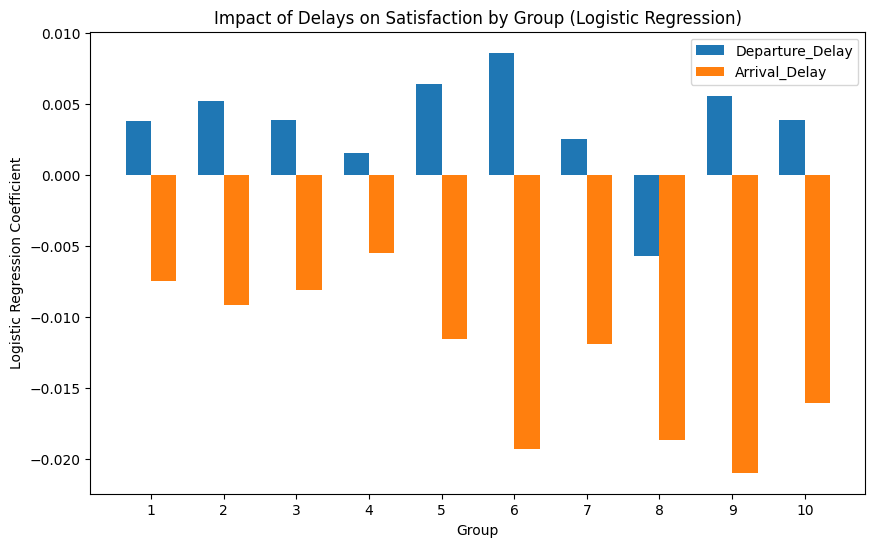

{1:                     Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
 const            1.752952  0.024203  72.427715  0.000000  1.705516  1.800389
 Departure_Delay  0.003794  0.002179   1.740839  0.081712 -0.000478  0.008066
 Arrival_Delay   -0.007470  0.002141  -3.488540  0.000486 -0.011666 -0.003273,
 2:                     Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
 const            1.780046  0.027071  65.755918  0.000000  1.726988  1.833103
 Departure_Delay  0.005175  0.002348   2.203511  0.027559  0.000572  0.009778
 Arrival_Delay   -0.009128  0.002286  -3.992007  0.000066 -0.013609 -0.004646,
 3:                     Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
 const            1.081645  0.025035  43.204645  0.000000  1.032576  1.130713
 Departure_Delay  0.003888  0.002270   1.712892  0.086732 -0.000561  0.008336
 Arrival_Delay   -0.008100  0.002239  -3.617445  0.000298 -0.012489 -0.003711,
 4:                     Coef.  Std.Err.          z  

In [3]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv(r'C:\Users\Dell\Desktop\dev데이터분석\project1\airline_passenger_satisfaction_age_group_202405171933.csv', encoding='unicode_escape')
data['Satisfaction_num'] = data['Satisfaction'].apply(lambda x: 1 if x == 'S' else 0)

# 필요한 변수 선택
# Initialize a dictionary to store logistic regression models
logistic_models = {}

# Perform logistic regression analysis for each group
for group in range(1, 11):
    group_data = data[data['group'] == group]
    X = group_data[['Departure_Delay', 'Arrival_Delay']]
    y = group_data['Satisfaction_num']
    X = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.Logit(y, X).fit(disp=0)
    logistic_models[group] = model

# Extract coefficients for each group
logistic_coefficients = {group: model.params for group, model in logistic_models.items()}

departure_delay_logit_coeffs = [logistic_coefficients[group]['Departure_Delay'] for group in range(1, 11)]
arrival_delay_logit_coeffs = [logistic_coefficients[group]['Arrival_Delay'] for group in range(1, 11)]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # the width of the bars
x = np.arange(1, 11)

ax.bar(x - width/2, departure_delay_logit_coeffs, width, label='Departure_Delay')
ax.bar(x + width/2, arrival_delay_logit_coeffs, width, label='Arrival_Delay')

ax.set_xlabel('Group')
ax.set_ylabel('Logistic Regression Coefficient')
ax.set_title('Impact of Delays on Satisfaction by Group (Logistic Regression)')
ax.set_xticks(x)
ax.legend()

plt.show()

# Display the summary of the logistic regression models for verification
logistic_summaries = {group: model.summary2().tables[1] for group, model in logistic_models.items()}
logistic_summaries
